# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import statsmodels.api as sm

In [2]:
gc=pd.read_excel('GermanCredit.xlsx')
gc.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


# 2. Check how many records do we have


In [3]:
gc.shape

(1000, 3)

In [4]:
# We have 1000 records

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:xlabel='CreditAmount', ylabel='Count'>

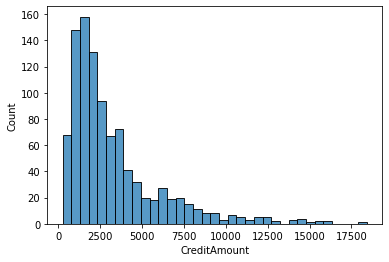

In [6]:
sns.histplot(data=gc,x='CreditAmount')

# 3b. Create creditability dataframe

In [7]:
creditability=gc['Creditability']

In [8]:
creditability=pd.DataFrame(creditability)

In [9]:
type(creditability)

pandas.core.frame.DataFrame

# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [10]:
pd.concat([gc,creditability],axis=1)

,Creditability,CreditAmount,DurationOfCreditInMonths,Creditability
0,1,1049,18,1
1,1,2799,9,1
2,1,841,12,1
3,1,2122,12,1
4,1,2171,12,1
...,...,...,...,...
995,0,1987,24,0
996,0,2303,24,0
997,0,12680,21,0
998,0,6468,12,0


In [11]:
gc['Creditability'].value_counts()

1    700
0    300
Name: Creditability, dtype: int64

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

<AxesSubplot:xlabel='CreditAmount', ylabel='DurationOfCreditInMonths'>

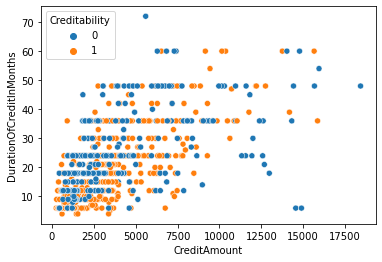

In [12]:
sns.scatterplot(data=gc,x='CreditAmount',y='DurationOfCreditInMonths',hue='Creditability')

# 6. Prepare input data for the model

In [13]:
x=gc.drop(['Creditability'],axis=1)
y=gc['Creditability']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# 7. Fit logistic regression model

In [14]:
model=sm.Logit(y_train,sm.add_constant(x_train)).fit()
y_pred=model.predict(sm.add_constant(x_train))
model.summary()

Optimization terminated successfully.
         Current function value: 0.580695
         Iterations 5


C:\Users\priyasmilysri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Sat, 04 Jun 2022   Pseudo R-squ.:                 0.03742
Time:                        12:53:52   Log-Likelihood:                -464.56
converged:                       True   LL-Null:                       -482.61
Covariance Type:            nonrobust   LLR p-value:                 1.437e-08
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.7104      0.166     10.324      0.000       1.386       2.035
CreditAmount             -5.326e-05   3.46e-05     -1.538      0.124      -0.000    1.46e-05
DurationOfCreditInMonths    -0.0302      0.008     -3.690      0.000      -0.046      -0.014
============================================================================================
"""

# 8. Test accuracy calculation

In [15]:
y_pred=model.predict(sm.add_constant(x_test))

C:\Users\priyasmilysri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
y_pred=y_pred.apply(lambda i: 1 if i>0.5 else 0)
y_pred.unique()
accuracy_score(y_test,y_pred)

0.675

# 9. Build a confusion matrix

In [17]:
con_mat=confusion_matrix(y_test,y_pred)
conf_mat=pd.DataFrame(con_mat,index=['actual 0','actual 1'],columns=['predicted 0','predicted 0'])
conf_mat

,predicted 0,predicted 0
actual 0,11,56
actual 1,9,124


# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

Text(0.02, 0.9, "('AUC Score:', 0.5483)")

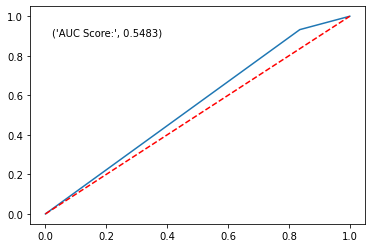

In [18]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc_score(y_test, y_pred),4)))